# Test de `pyplot` avec matrices de pixels

On suit [realpython.com](https://realpython.com/python-matplotlib-guide/#a-burst-of-color-imshow-and-matshow)

In [39]:
l = 3
c = 4

t0 = [[0 for i in range(c)] for j in range(l)]
t127 = [[127 for i in range(c)] for j in range(l)]
t255 = [[255 for i in range(c)] for j in range(l)]

# degradé de valeurs de 0 à 255
unit = 255//(l*c) 
t = [[ (i + j*c) * unit for i in range(c)] for j in range(l)] 
print(t)

[[0, 21, 42, 63], [84, 105, 126, 147], [168, 189, 210, 231]]


In [18]:
import matplotlib.pyplot as plt

> toggle “off” all axis labels and ticks by using a dictionary comprehension and passing the result to ax.tick_params()

In [19]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


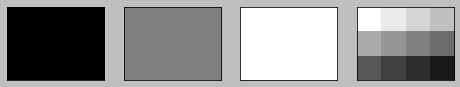

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 4))

ax1.matshow(t0, cmap="gray", vmin=0, vmax=255)
ax2.matshow(t127, cmap="gray", vmin=0, vmax=255)
ax3.matshow(t255, cmap="gray", vmin=0, vmax=255)
ax4.matshow(t, cmap="gray_r", vmin=0, vmax=255)

for ax in (ax1, ax2, ax3, ax4):
    ax.tick_params(axis='both', which='both', **nolabels)

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


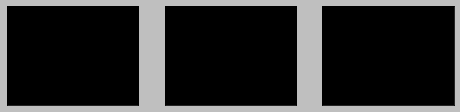

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))

ax1.matshow(t0, cmap="gray")
ax2.matshow(t127, cmap="gray")
ax3.matshow(t255, cmap="gray")


for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='both', which='both', **nolabels)

In [ ]:
plt.style.use('grayscale')

> use a context manager to disable the grid, and call matshow() on each Axes. 
> Lastly, we need to put the colorbar in what is technically a new Axes within fig. 
> For this, we can use a bit of an esoteric function from deep within matplotlib:

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(t0)
    img2 = ax2.matshow(t1, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)